In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import DetCurveDisplay, RocCurveDisplay

import matplotlib.pyplot as plt 

In [2]:
x, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_redundant=0, 
    n_informative=2, 
    random_state=42, 
    n_clusters_per_class=1
)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
classifiers = {
    'Linear SVM': make_pipeline(StandardScaler(), LinearSVC(C=0.025)), 
    'Random Forest': RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1
    )
}

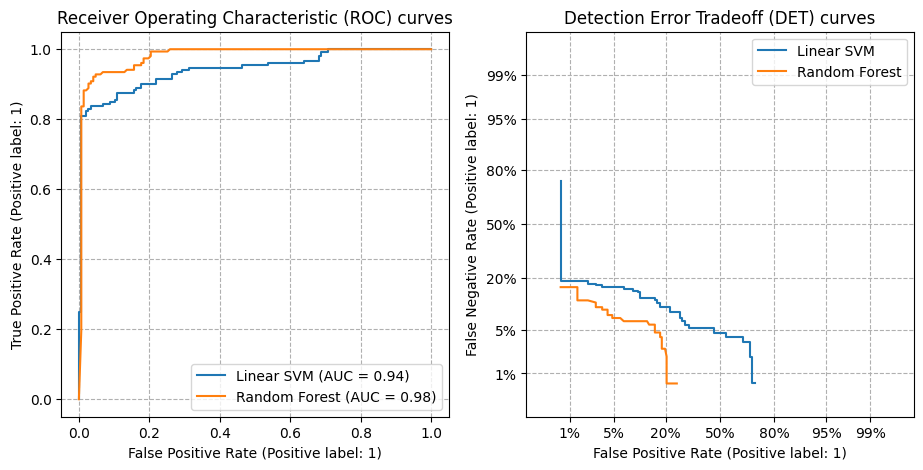

In [15]:
fig, axes = plt.subplots(ncols=2, figsize=(11, 5))

for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    
    RocCurveDisplay.from_estimator(clf, x_test, y_test, ax=axes[0], name=name)
    DetCurveDisplay.from_estimator(clf, x_test, y_test, ax=axes[1], name=name)
    
axes[0].set_title('Receiver Operating Characteristic (ROC) curves')
axes[1].set_title('Detection Error Tradeoff (DET) curves')

axes[0].grid(linestyle='--')
axes[1].grid(linestyle='--')

plt.legend()
plt.show()